### Linear regression with Algerain Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_cleaned.csv')

In [3]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,month
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0,6
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0,6
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0,6
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0,6
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0,6


In [4]:
df = df.drop('month', axis = 1)

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
 11  region       243 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 22.9 KB


In [7]:
### Dividing the dependent and indepedent features
x = df.drop('FWI', axis = 1)
y = df['FWI']

In [8]:
### Train test split
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.25, random_state= 42)

## Feature Selection based on correlation

In [10]:
cor = x.corr()

In [11]:
cor

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.586639,0.089408
Classes,0.516015,-0.432161,-0.069964,-0.379097,0.769492,0.585658,0.511123,0.735197,0.586639,1.000000,0.162347


In [12]:
cor.index[abs(cor['Temperature'])>0.85].to_list()

['Temperature']

In [13]:
# function to identify columns with correlation more than threshold
def correlation(ds,threshold):
    temp = []
    for i in ds.columns:
        j = ds.index[abs(ds[i])>0.85].to_list()
        if j[0] != i:
            temp.append(j)
    return temp

In [14]:
cols = correlation(cor,0.85)

In [15]:
cols

[['DMC', 'DC', 'BUI'], ['DMC', 'DC', 'BUI']]

In [16]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [17]:
x_train.drop(['DC','BUI'], axis = 1, inplace = True)
x_test.drop(['DC','BUI'],axis = 1, inplace = True)


In [18]:
x_train.shape

(182, 9)

In [19]:
x_test.shape

(61, 9)

In [20]:
### Feature Scaling
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
x_train_scaled = scaler.fit_transform(x_train)


In [23]:
x_test_scaled = scaler.transform(x_test)

<AxesSubplot: >

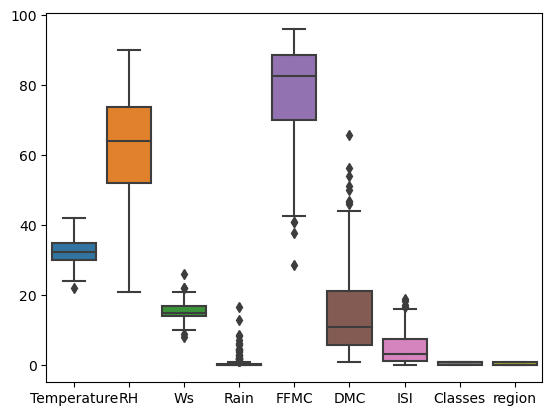

In [24]:
sns.boxplot(data = x_train)

<AxesSubplot: >

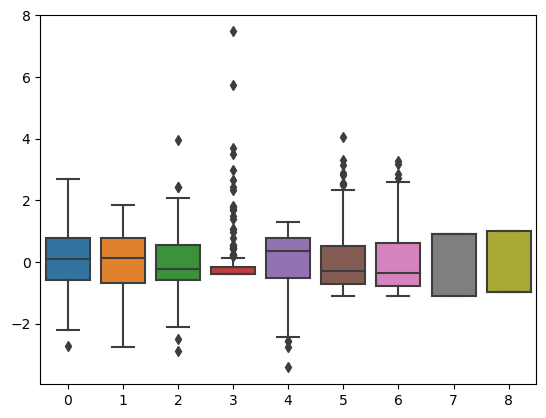

In [25]:
sns.boxplot(data = x_train_scaled)

### Linear Regression Model

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [27]:
regressor = LinearRegression()

In [28]:
regressor.fit(x_train_scaled,y_train)

LinearRegression()

In [29]:
y_pred = regressor.predict(x_test_scaled)

In [30]:
mae = mean_absolute_error(y_test,y_pred)

In [31]:
r_sqrt = r2_score(y_test,y_pred)

In [32]:
print("mae =",mae)
print("r Squared = ", r_sqrt)

mae = 0.5468236465249985
r Squared =  0.9847657384266951


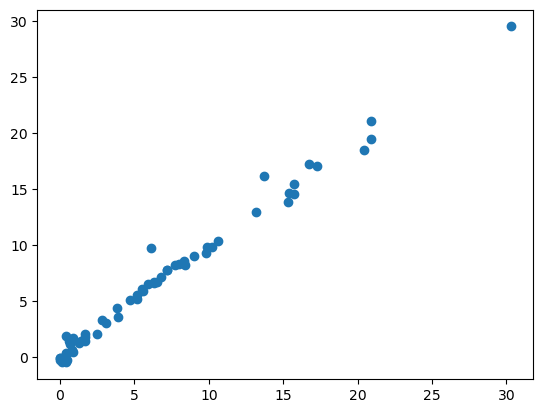

In [33]:
plt.scatter(y_test,y_pred)

In [34]:
from sklearn.linear_model import Lasso

In [35]:
L_regressor = Lasso()

In [36]:
L_regressor.fit(x_train_scaled,y_train)
y_pred_lasso = L_regressor.predict(x_test_scaled)

In [37]:
mae = mean_absolute_error(y_test,y_pred_lasso)
r_sqrt = r2_score(y_test,y_pred_lasso)

In [38]:
print("mae =",mae)
print("r Squared = ", r_sqrt)

mae = 1.133175994914409
r Squared =  0.9492020263112388


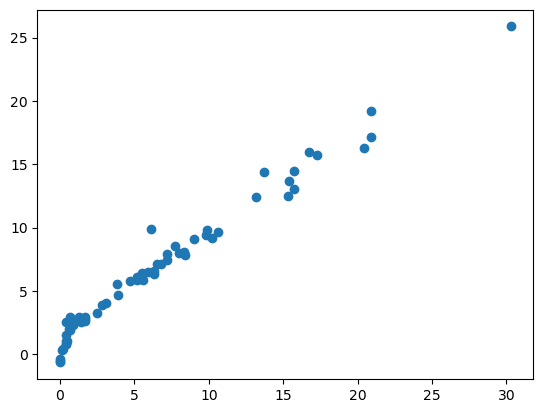

In [39]:
plt.scatter(y_test,y_pred_lasso)

<AxesSubplot: xlabel='FWI'>

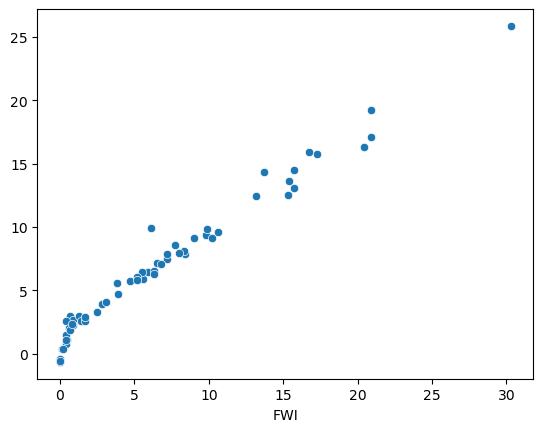

In [40]:
sns.scatterplot(x = y_test , y = y_pred_lasso)

In [41]:
from sklearn.linear_model import LassoCV

In [43]:
regressor_lassoCV = LassoCV(cv = 5)

In [44]:
regressor_lassoCV.fit(x_train_scaled,y_train)

LassoCV(cv=5)

In [45]:
y_lassoCV_predict = regressor_lassoCV.predict(x_test_scaled)

In [47]:
mae = mean_absolute_error(y_test,y_lassoCV_predict)
r_sqrt = r2_score(y_test, y_lassoCV_predict)

In [48]:
print("mae =",mae)
print("r Squared = ", r_sqrt)

mae = 0.6199701158263433
r Squared =  0.9820946715928275


<AxesSubplot: xlabel='FWI'>

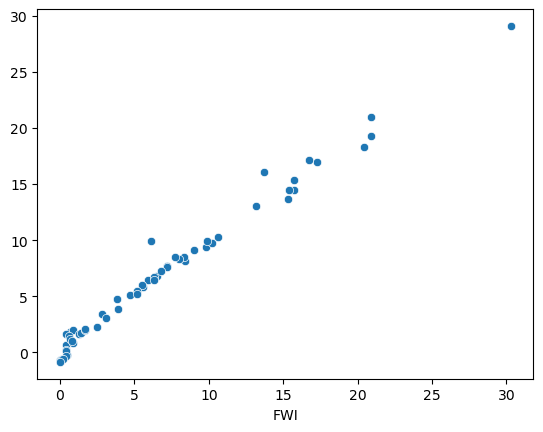

In [50]:
sns.scatterplot(x= y_test,  y = y_lassoCV_predict)

In [51]:
### Ridge Regression

In [52]:
from sklearn.linear_model import Ridge

In [53]:
regressor_ridge =Ridge()

In [54]:
regressor_ridge.fit(x_train_scaled,y_train)

Ridge()

In [55]:
y_ridge_predict = regressor_ridge.predict(x_test_scaled)

mae = 0.5642305340105692
r Squared =  0.9842993364555513


<AxesSubplot: xlabel='FWI'>

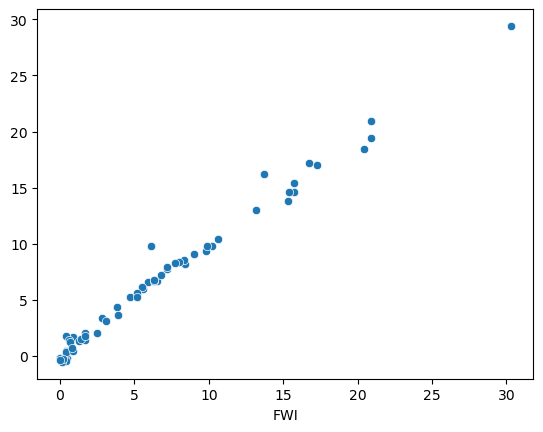

In [57]:
mae = mean_absolute_error(y_test, y_ridge_predict)
r_sqrt= r2_score(y_test, y_ridge_predict)
print("mae =",mae)
print("r Squared = ", r_sqrt)
sns.scatterplot(x = y_test, y= y_ridge_predict)

### Ridge CV Cross validation

In [58]:
from sklearn.linear_model import RidgeCV

In [59]:
regressor_ridgeCV = RidgeCV(cv =5)

In [60]:
regressor_ridgeCV.fit(x_train_scaled,y_train)

RidgeCV(cv=5)

In [62]:
y_ridgeCV_predict = regressor_ridgeCV.predict(x_test_scaled)

mae = 0.5642305340105692
r Squared =  0.9842993364555513


<AxesSubplot: xlabel='FWI'>

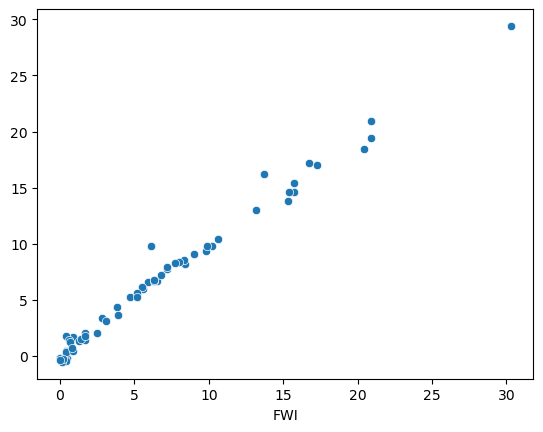

In [63]:
mae = mean_absolute_error(y_test, y_ridgeCV_predict)
r_sqrt= r2_score(y_test, y_ridgeCV_predict)
print("mae =",mae)
print("r Squared = ", r_sqrt)
sns.scatterplot(x = y_test, y= y_ridgeCV_predict)

### Elastic net regression

In [64]:
from sklearn.linear_model import ElasticNet

In [65]:
regressor_elasticNet = ElasticNet()

In [66]:
regressor_elasticNet.fit(x_train_scaled,y_train)

ElasticNet()

In [67]:
y_elasticNet_predict = regressor_elasticNet.predict(x_test_scaled)

mae = 1.8822353634896005
r Squared =  0.8753460589519703


<AxesSubplot: xlabel='FWI'>

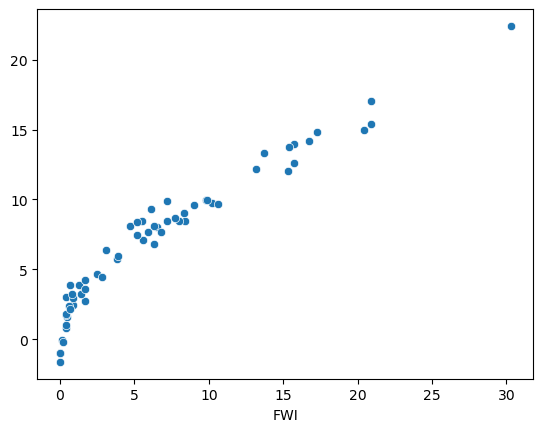

In [68]:
mae = mean_absolute_error(y_test, y_elasticNet_predict)
r_sqrt= r2_score(y_test, y_elasticNet_predict)
print("mae =",mae)
print("r Squared = ", r_sqrt)
sns.scatterplot(x = y_test, y= y_elasticNet_predict)

### ElasticNet CV

In [69]:
from sklearn.linear_model import ElasticNetCV

In [70]:
regressor_ElasticNetCV = ElasticNetCV(cv = 5)

In [71]:
regressor_ElasticNetCV.fit(x_train_scaled,y_train)

ElasticNetCV(cv=5)

In [73]:
y_elasticNetCV_predict = regressor_ElasticNetCV.predict(x_test_scaled)

mae = 0.6575946731430898
r Squared =  0.9814217587854941


<AxesSubplot: xlabel='FWI'>

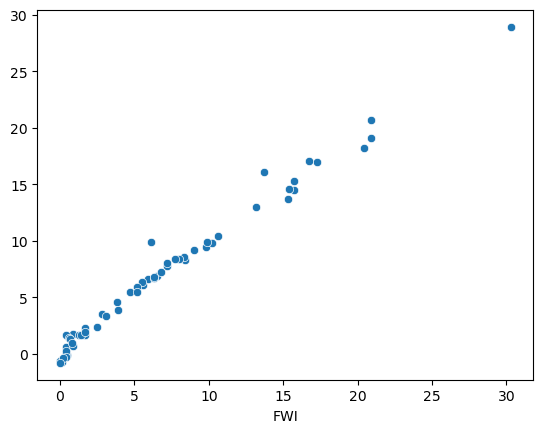

In [74]:
mae = mean_absolute_error(y_test, y_elasticNetCV_predict)
r_sqrt= r2_score(y_test, y_elasticNetCV_predict)
print("mae =",mae)
print("r Squared = ", r_sqrt)
sns.scatterplot(x = y_test, y= y_elasticNetCV_predict)

In [75]:
import pickle

In [76]:
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(regressor_ridge,open('ridge.pkl','wb'))
pickle.dump(regressor_ridgeCV,open('ridgeCV.pkl','wb'))

In [78]:
model = pickle.load(open('ridge.pkl','rb'))

In [79]:
model.fit(x_train_scaled,y_train)

Ridge()